# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Making a list of missing value types this way we can find missing values other than na and null, like any special characters 
missing_values = ["n/a", "na", "--","","?"]

In [2]:
data_df = pd.read_csv("bank.csv",na_values = missing_values)

# Check the data. Check shape, data type, and info

In [3]:
data_df.shape

(515, 6)

In [4]:
data_df.info()
# All Integer datatypes with BANK ID which has unique values, please drop this column for clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
Bank                   515 non-null int64
DD                     515 non-null int64
Withdrawals            515 non-null int64
Deposits               515 non-null int64
Branch Area in sqft    515 non-null int64
avg daily walkins      515 non-null int64
dtypes: int64(6)
memory usage: 24.3 KB


In [5]:
data_clus_df = data_df.drop('Bank', axis =1) #removing the unique

# Checking Summary Statistic

In [6]:
data_clus_df.describe().transpose()
# DD - Mean < Median ~ Right Skewed distribution
# Withdrawals - Mean < Median ~ Right Skewed distribution
# Deposits -  Mean > Median ~ left -skewed distribution
# Branch area in Sqft - Mean < Median ~ Rigth-Skewed dsitribution
# Avg daily walkins - Mean < Median ~ Right -skewed distribution

,count,mean,std,min,25%,50%,75%,max
DD,515.0,232.252427,66.648815,120.0,169.5,237.0,291.0,350.0
Withdrawals,515.0,150.693204,56.897777,10.0,103.0,152.0,200.0,247.0
Deposits,515.0,81.687379,28.596912,33.0,58.0,80.0,105.0,212.0
Branch Area in sqft,515.0,2934.669903,437.062831,1200.0,2675.0,2960.0,3300.0,3650.0
avg daily walkins,515.0,598.603883,83.487891,380.0,537.5,601.0,657.5,838.0


# Checking for Duplicates

In [7]:
#checking for missing values
print("The total no of missing rows is {}".format(data_clus_df.isnull().sum() + data_clus_df.isna().sum()))
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data_clus_df[data_clus_df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

The total no of missing rows is DD                     0
Withdrawals            0
Deposits               0
Branch Area in sqft    0
avg daily walkins      0
dtype: int64
Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [DD, Withdrawals, Deposits, Branch Area in sqft, avg daily walkins]
Index: []


# Scaling the data

In [8]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [9]:
# Creating an object for the StandardScaler function
bank_features = data_df.drop('Bank', axis=1)
cols = bank_features.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(bank_features)
scaled_df = pd.DataFrame(scaled_df, columns = cols)
scaled_df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039
...,...,...,...,...,...
510,1.573163,-0.188120,1.026024,-0.674860,1.143745
511,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458
512,1.513088,-1.138113,0.921016,-0.193913,0.927935
513,-0.604535,0.445209,-1.669192,-0.400033,-1.122257


# Creating Clusters using KMeans

### Build a KMeans model having 2 Clusters

In [10]:
# Create K Means cluster and store the result in the object k_means
final_model=KMeans(2, random_state = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001438F068D08>,
      dtype=object)

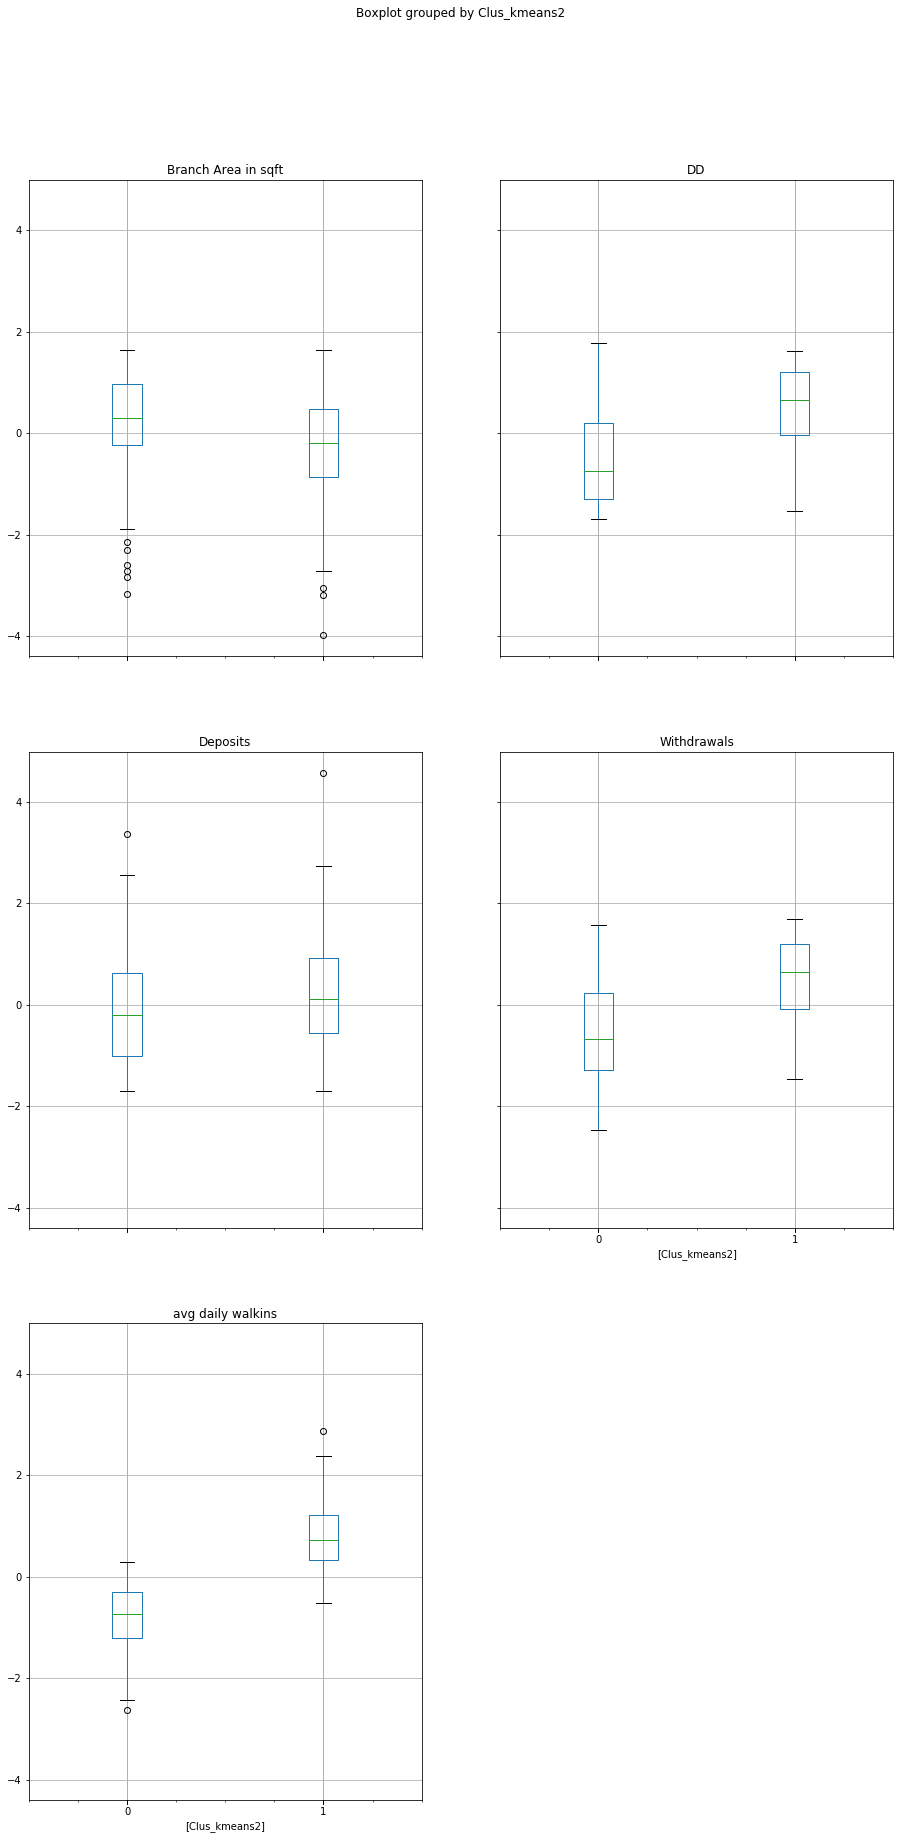

In [11]:
# Fit K means on the scaled_df
final_model.fit(scaled_df)
prediction=final_model.predict(scaled_df)
scaled_df["Clus_kmeans2"] =  prediction
scaled_df.boxplot(by = 'Clus_kmeans2',  figsize=(15, 30))

### Check cluster Output for all the observations

In [12]:
# Get the labels
final_model.labels_

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

### Calculate within Cluster Sum of Squares

In [13]:
from scipy.spatial.distance import cdist
clusters=range(1,7)

### Form clusters with K = 1,3,4,5,6 and compare the WSS ( within cluster sum of squares)

In [14]:
cluster_error = []
for k in clusters:
   if (k != 2):
        print(k)
        bank_model=KMeans(k)
        bank_model.fit(scaled_df)
        prediction=bank_model.predict(scaled_df)
        cluster_error.append(sum(np.min(cdist(scaled_df, bank_model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])
cluster_error

1


<IPython.core.display.Javascript object>

3


<IPython.core.display.Javascript object>

4


<IPython.core.display.Javascript object>

5


<IPython.core.display.Javascript object>

6


<IPython.core.display.Javascript object>

[2.2074750654402804,
 1.6887323846792,
 1.5809209101347121,
 1.4966064054135046,
 1.4196904770515715]

### Calculate WSS for other values of K ( can use range of K = 1 to 20) - Elbow Method

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

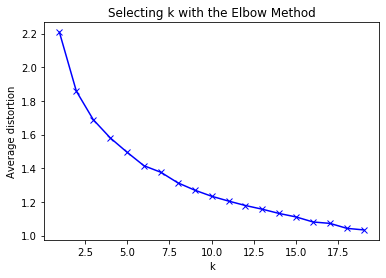

In [15]:
wss =[]
clusters=range(1,20)
for k in clusters:
    bank_model=KMeans(n_clusters=k)
    bank_model.fit(scaled_df)
    prediction=bank_model.predict(scaled_df)
    wss.append(sum(np.min(cdist(scaled_df, bank_model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])
# Elbow plot to identify the Optimal clusters where there is sharp decline in the SSE
plt.plot(clusters, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

## Build a KMeans model with K=3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001438FE5B508>,
      dtype=object)

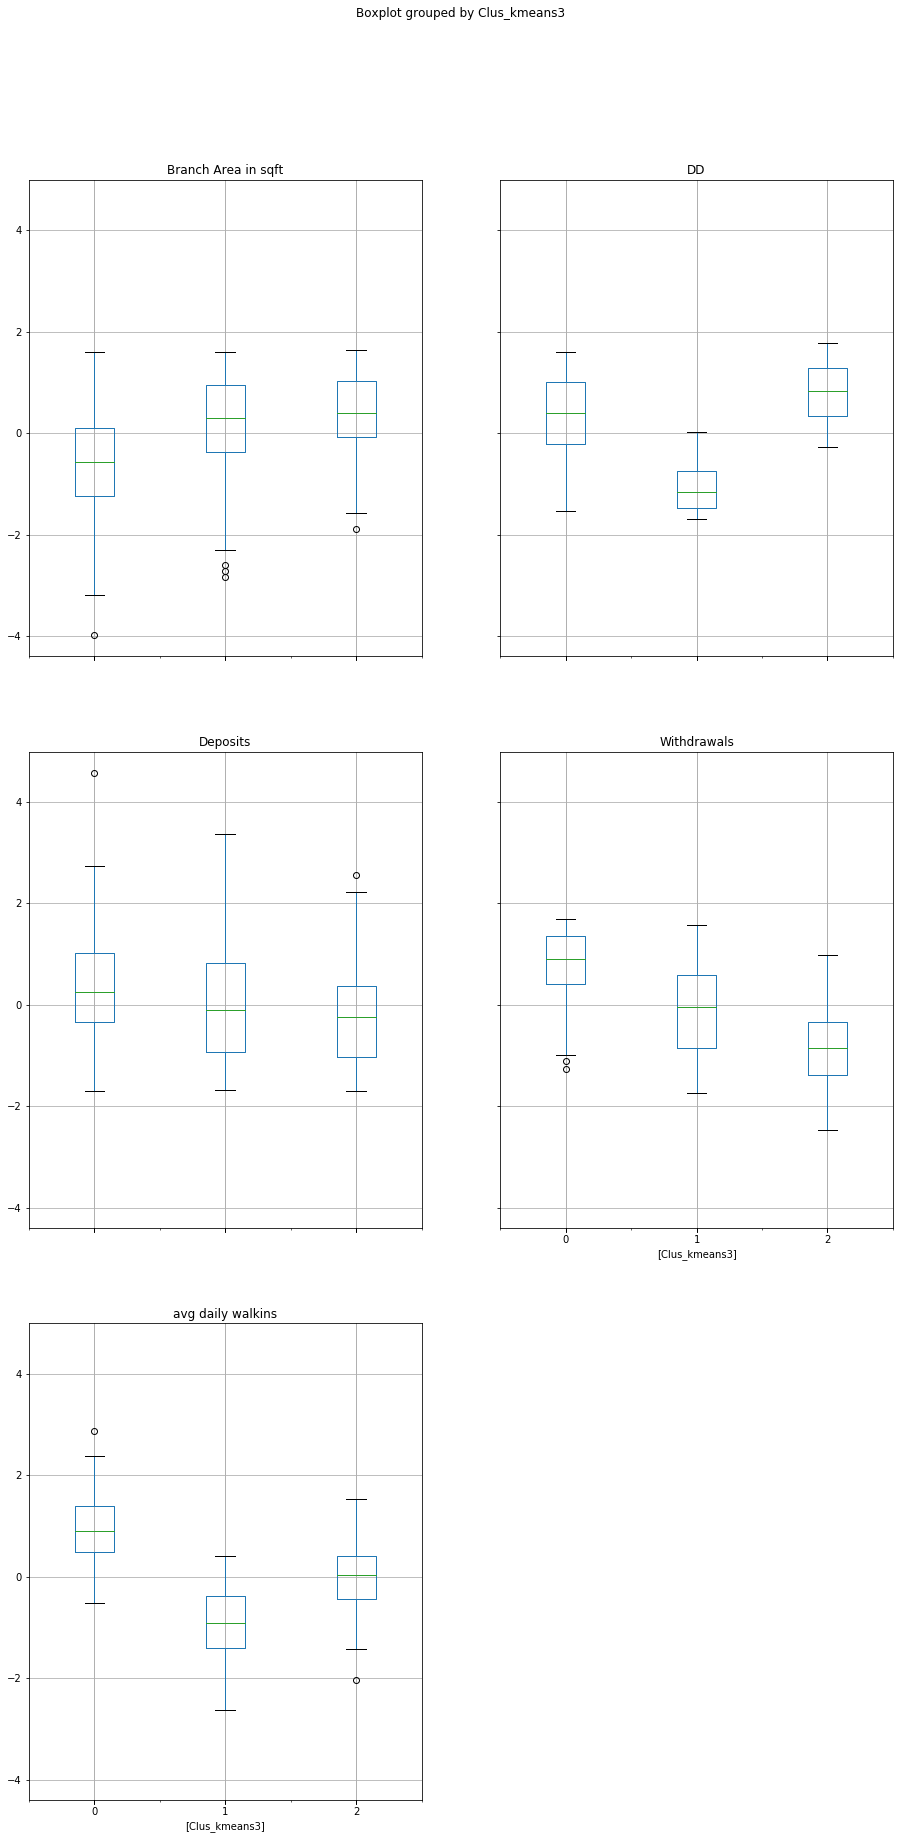

In [16]:
scaled_df.drop(['Clus_kmeans2'],axis=1,inplace = True)
# Create K Means cluster and store the result in the object k_means
final_model=KMeans(3, random_state = 10)
# Fit K means on the scaled_df
final_model.fit(scaled_df)
prediction=final_model.predict(scaled_df)
scaled_df["Clus_kmeans3"] =  prediction
scaled_df.boxplot(by = 'Clus_kmeans3',  figsize=(15, 30))

In [17]:
scaled_df.Clus_kmeans3.value_counts().sort_index()

0    180
1    177
2    158
Name: Clus_kmeans3, dtype: int64

<IPython.core.display.Javascript object>

D:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


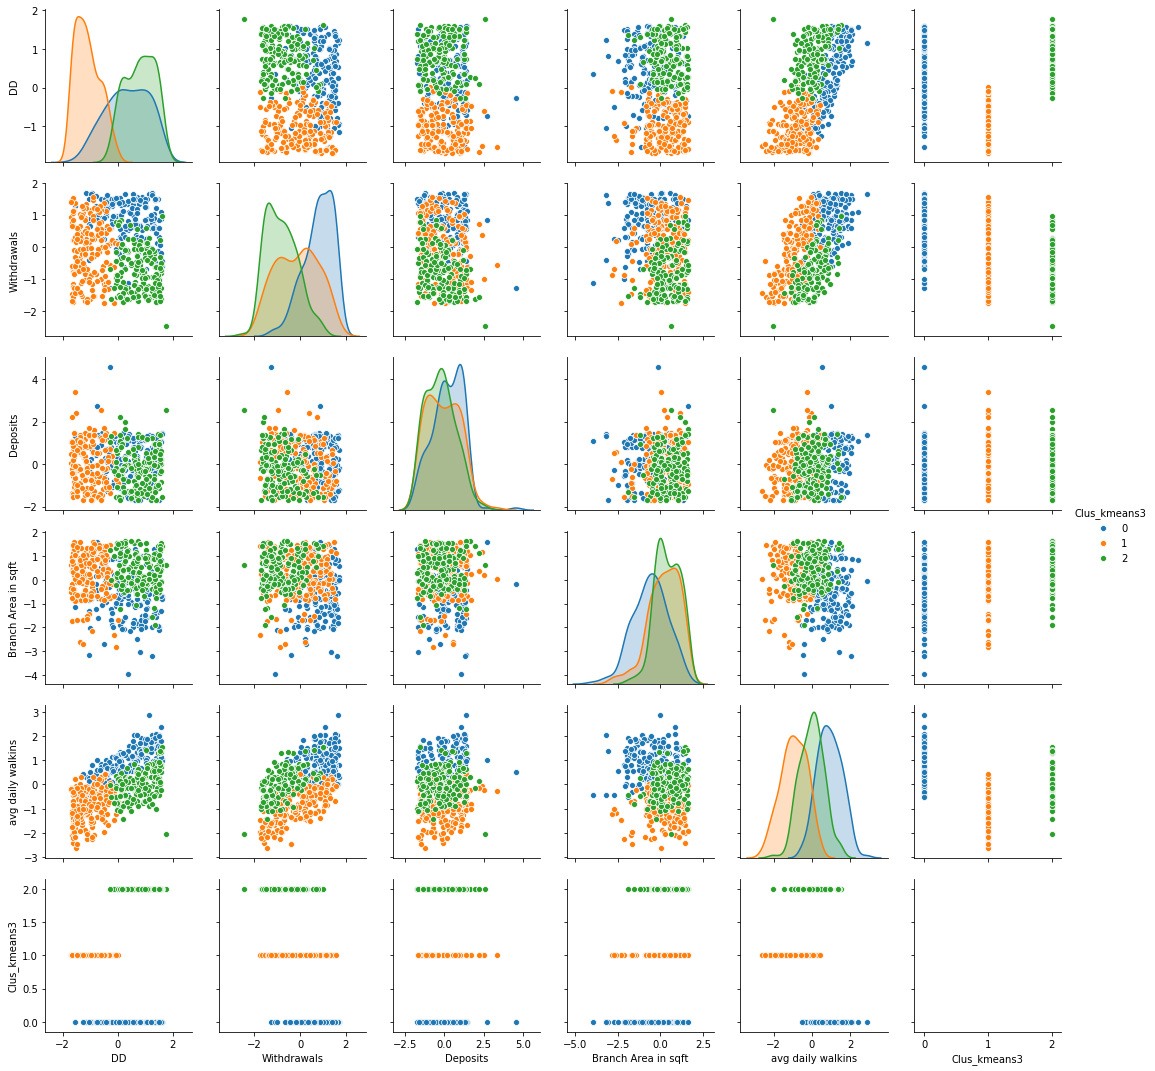

In [18]:
sns.pairplot(scaled_df, diag_kind = 'kde', hue = 'Clus_kmeans3')

In [19]:
# K-Means # Analysis & Insights for customer segmentation
# Cluster 0: Higher DD, highest number of deposits, highest withdrawals and more number of walk-ins - Large sized Bank
# Cluster 1: Less DD, Medium deposits, Medium withdrawals, but low number of Walk-ins - Medium sized Bank
# Cluster 2: Highest DD, Less deposits, Less withdrawals, and more number of walk-ins - Small sized Bank

### Use silhouette score to evaluate the above model ( 3 clusters)

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score

Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.2983757630221342


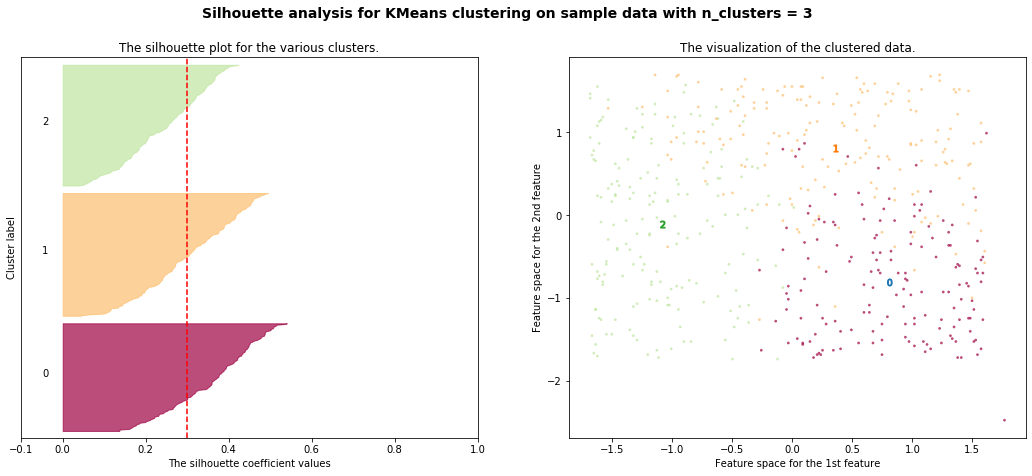

For n_clusters = 4 The average silhouette_score is : 0.2729314051427246


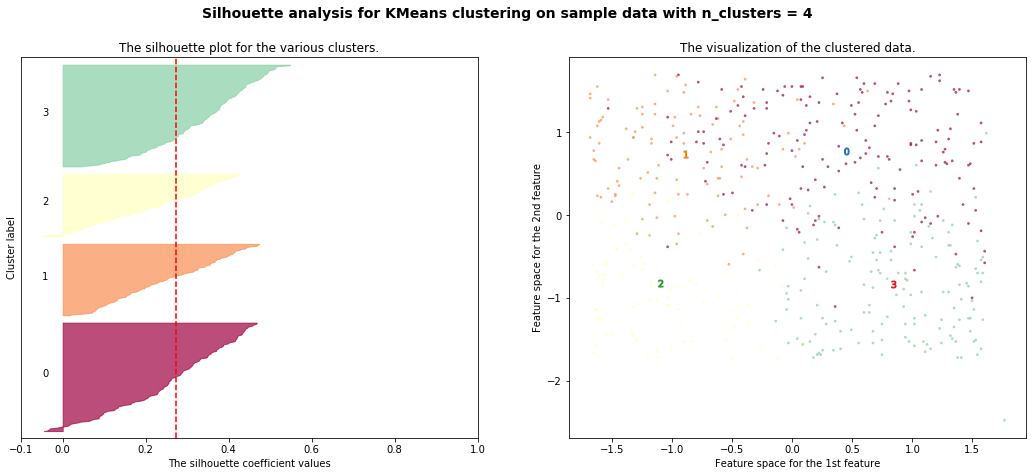

For n_clusters = 5 The average silhouette_score is : 0.2616635819840128


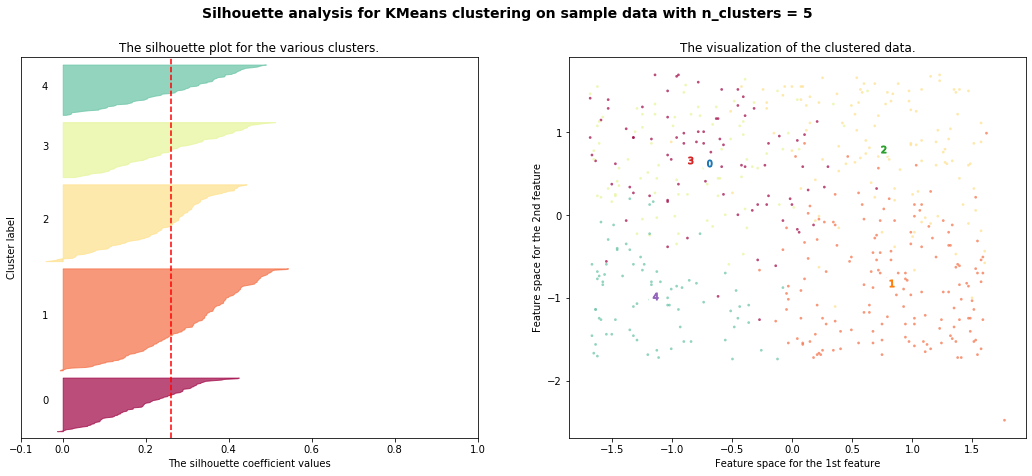

For n_clusters = 6 The average silhouette_score is : 0.23199159031801841


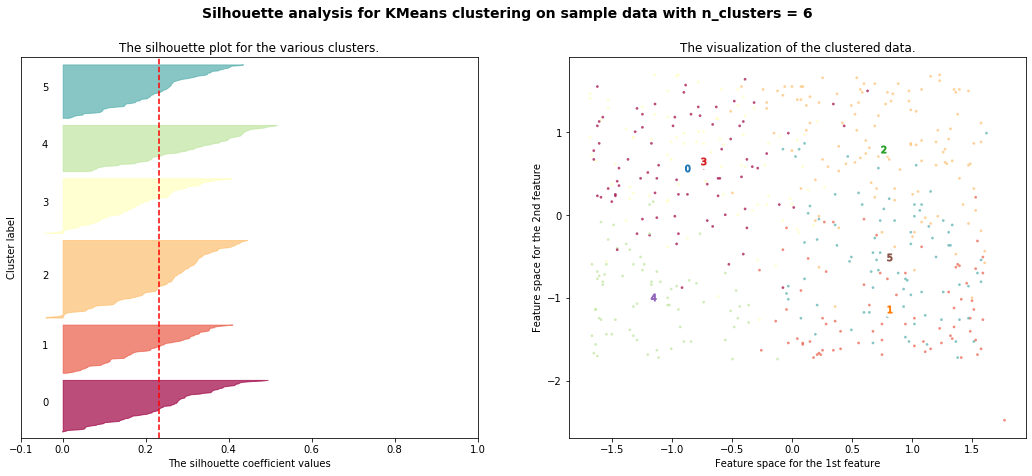

For n_clusters = 7 The average silhouette_score is : 0.22233631222137226


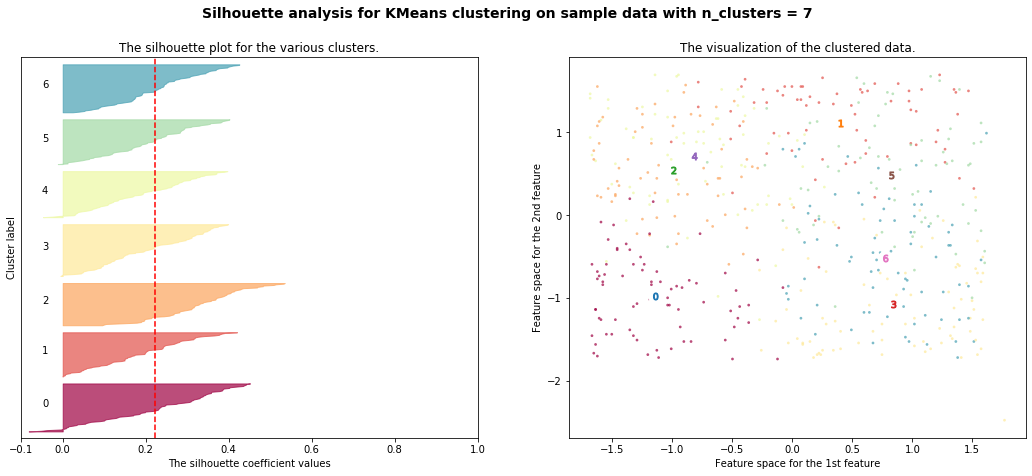

In [21]:
# Calculating silhouette_score
# The below function is from Sklearn for the Silhouette scores - Cluster Analysis ( Kmeans)
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=scaled_df.values

range_n_clusters = [3,4,5,6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Build a KMeans model with K=4

### Use silhouette score to evaluate the above model ( 4 clusters)

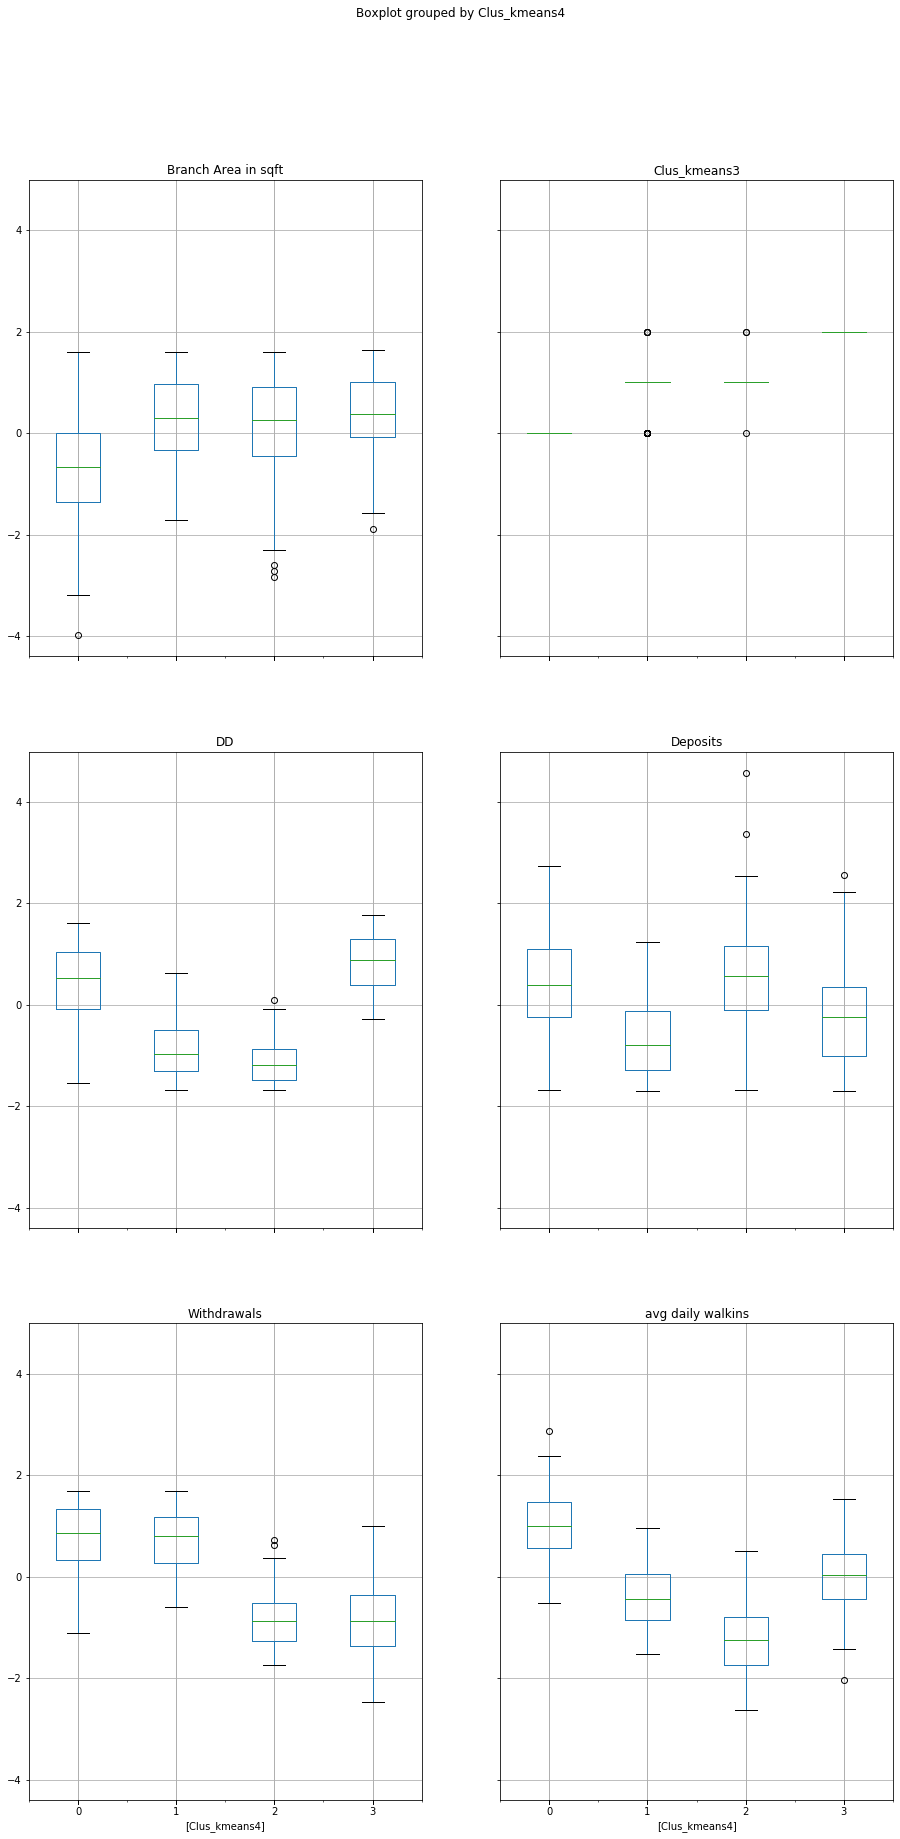

In [22]:
#scaled_df.drop(['Clus_kmeans3'],axis=1,inplace = True)
# Create K Means cluster and store the result in the object k_means
final_model=KMeans(4, random_state = 10)
# Fit K means on the scaled_df
final_model.fit(scaled_df)
prediction=final_model.predict(scaled_df)
scaled_df["Clus_kmeans4"] =  prediction
scaled_df.boxplot(by = 'Clus_kmeans4',  figsize=(15, 30))
data_df["Clus_kmeans4"] = prediction

Appending Clusters to the original dataset

# Cluster Profiling

In [23]:
data_df.Clus_kmeans4.value_counts().sort_index()

0    162
1    107
2     94
3    152
Name: Clus_kmeans4, dtype: int64

In [24]:
clust_profile=data_df.drop(['Bank'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=data_df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
Clus_kmeans4,,,,,,
0,261.864198,194.691358,90.574074,2641.481481,680.555556,162
1,172.822430,192.448598,63.373832,3064.205607,563.747664,107
2,158.659574,103.851064,97.595745,2996.010638,497.840426,94
3,288.039474,103.375000,75.269737,3118.026316,598.111842,152


- Cluster 0: Small size bank with less deposit but highest walkins and Withdrawals, and large DD
- Cluster 1: Medium size bank with less walkins and deposits and high withdrawals
- Cluster 2: Medium size bank with less withdrawal,walkin, DD but highest Deposit
- Cluster 3: Large size bank with more number of walkins and highest DD, but less Deposits


# Mention your insights

<IPython.core.display.Javascript object>

D:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


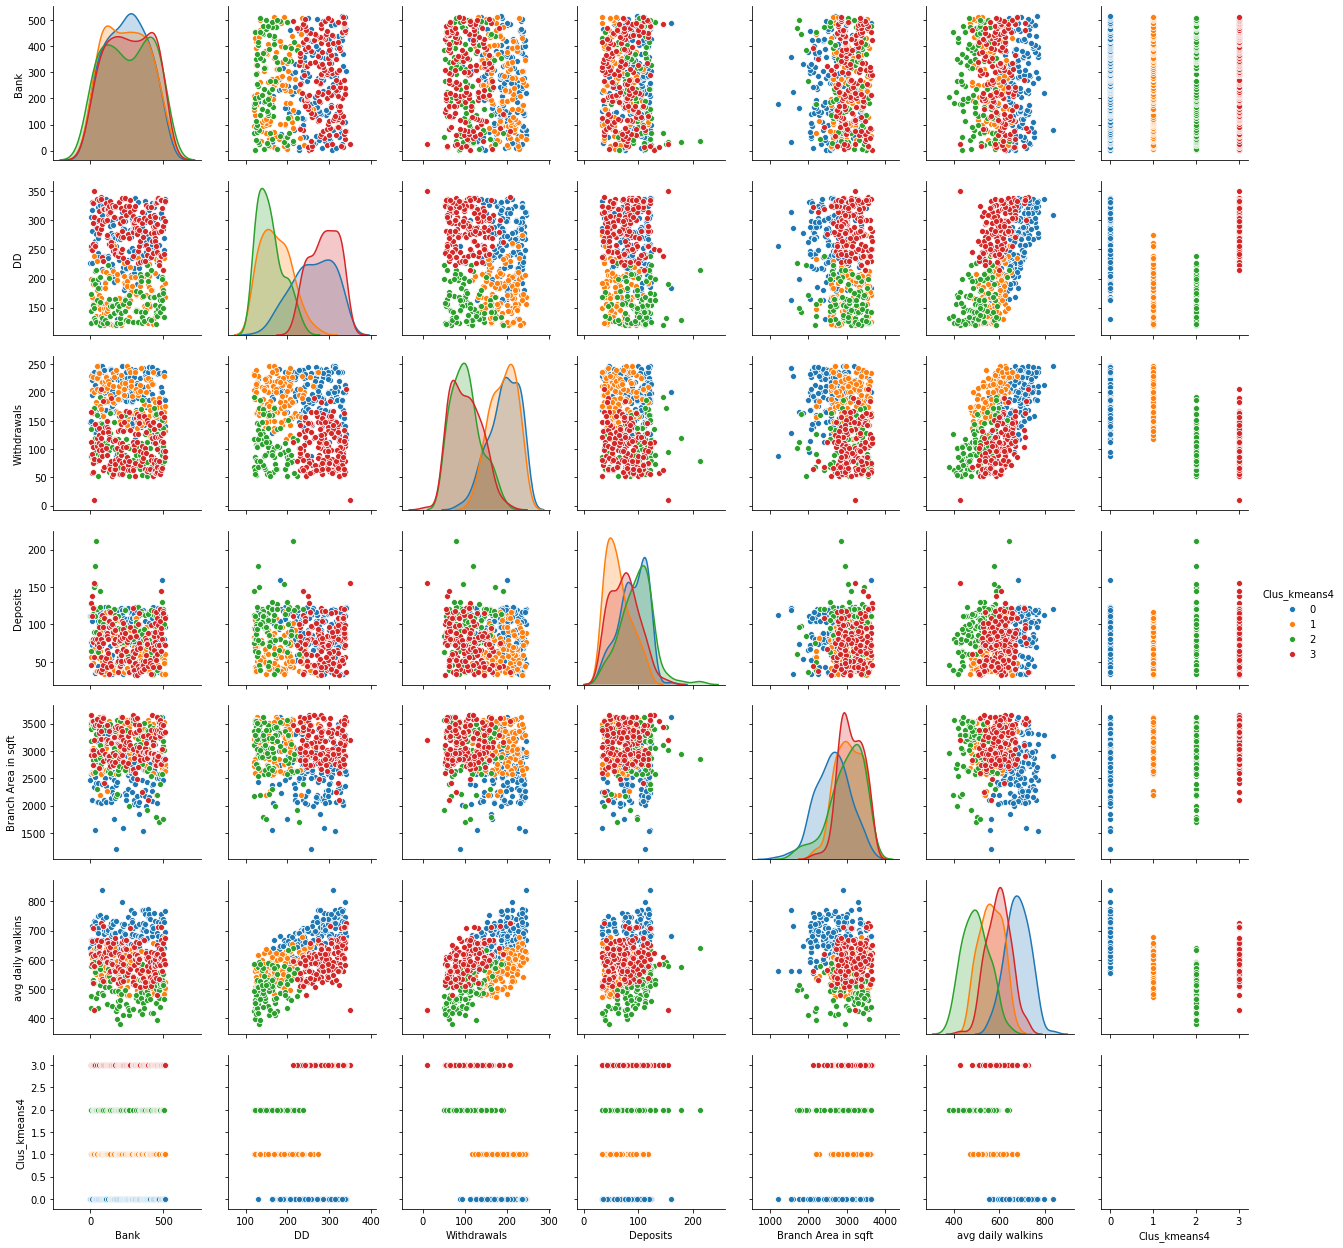

In [25]:
sns.pairplot(data_df, diag_kind = 'kde', hue = 'Clus_kmeans4')

In [26]:
# Based on the Dispersion of the Data and Silhouette scores for K =2,3,4,5 and 6; 
# optimal values for customer segmentation will be K =4; Silhouette score of 0.2729

In [27]:
# Cluster 0: Small Size Bank(162):Deposits = 90.57(less);Withdrawals= 194.69(highest);Walk-ins = 680.55(highest) and DD : 261.86
# Cluster 1: Medium Size Bank(107):Deposits = 63.37 Walk-ins = 563.74 and Withdrawals = 192.44
# Cluster 2: Medium Size Bank(94):Withdrawals = 103.85; walk-ins = 497.84 and Deposits = 97.59(highest)
# cluster 4 : Large size Bank(152):Walk-ins = 598.11; DD = 298.86; Deposits =75.26(Less)